<a href="https://colab.research.google.com/github/alx1056/Simple_Covid_Correlation/blob/main/SimpleCovid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
covid = pd.read_csv('covid_19_data.csv')
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


#Covid Analysis

In [93]:
covid = pd.DataFrame(data=covid,columns=['SNo', 'ObservationDate', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered'])

covid = covid.dropna()

covid

,SNo,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,1,01/22/2020,Mainland China,1.0,0.0,0.0
1,2,01/22/2020,Mainland China,14.0,0.0,0.0
2,3,01/22/2020,Mainland China,6.0,0.0,0.0
3,4,01/22/2020,Mainland China,1.0,0.0,0.0
4,5,01/22/2020,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...,...
205946,205947,01/19/2021,Ukraine,62492.0,738.0,39168.0
205947,205948,01/19/2021,Netherlands,13031.0,149.0,0.0
205948,205949,01/19/2021,Mainland China,1316.0,1.0,1298.0
205949,205950,01/19/2021,Ukraine,42758.0,707.0,37834.0


In [94]:
covid = covid.dropna()

In [95]:
X = covid[['Confirmed', 'Recovered']]
y = covid['Deaths']

Text(0.5, 1.0, 'Correlation of Variables')

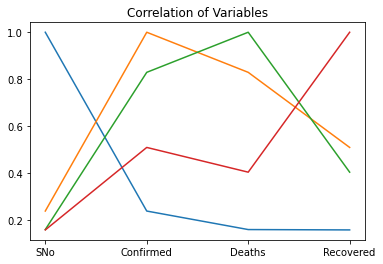

In [121]:
plt.plot(covid.corr(method='pearson'))
plt.title("Correlation of Variables")

#World wide COVID

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
predictedCovid = model.predict([[1000,1000]])
print(predictedCovid)

[220.92280996]


In [100]:
deaths = []
recovered = []
confirmed = []
for i in range(0,100001,10):
  predictedCovid = model.predict([[i,i]])
  deaths.append(i)
  recovered.append(i)
  confirmed.append(predictedCovid)
print("Deaths: "  +str(deaths))
print("\n")
print("Recovered: "  +str(recovered))
print("\n")
print("Confirmed: "  +str(confirmed))

Deaths: [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310, 1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430, 1440, 1450, 1460, 1470, 1480, 1490, 1500, 1510, 1520, 1530, 1540, 1550, 1560, 1570, 1580, 1590, 1600, 1610, 1620, 1630, 1640, 1650, 1660, 1670, 1680, 1690, 1700, 1710, 1720, 1730, 1740, 1750, 1760, 1770, 1780, 1790, 1800, 1810, 1820, 1830

In [101]:
print(model.coef_)
print("This shows that for every " + str(1/model.coef_[0]) + " Confirmed Case, We have 1 death worldwide")

[ 0.02391683 -0.00075878]
This shows that for every 41.811553452867834 Confirmed Case, We have 1 death worldwide


#US COVID

In [102]:
covid = pd.DataFrame(data=covid,columns=['SNo', 'ObservationDate', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered'])
covid_new = covid[covid['Country/Region'] == 'US']

covid_new.dropna()

covid_new

,SNo,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
31,32,01/22/2020,US,1.0,0.0,0.0
69,70,01/23/2020,US,1.0,0.0,0.0
117,118,01/24/2020,US,1.0,0.0,0.0
118,119,01/24/2020,US,1.0,0.0,0.0
158,159,01/25/2020,US,1.0,0.0,0.0
...,...,...,...,...,...,...
205917,205918,01/19/2021,US,451076.0,5798.0,0.0
205927,205928,01/19/2021,US,289939.0,3903.0,0.0
205930,205931,01/19/2021,US,110820.0,1815.0,0.0
205932,205933,01/19/2021,US,571268.0,5973.0,0.0


In [103]:
covid_new = covid_new.dropna()

X = covid_new[['Confirmed', 'Recovered']]
y = covid_new['Deaths']

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model_new = LinearRegression()
model_new.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
predictedCovid_US = model_new.predict([[1000,1000]])
print(predictedCovid_US)

[679.56520697]


In [106]:
deaths = []
recovered = []
confirmed = []
for i in range(0,100001,10):
  predictedCovid_US = model_new.predict([[i,i]])
  deaths.append(i)
  recovered.append(i)
  confirmed.append(predictedCovid_US)
print("Deaths: "  +str(deaths))
print("\n")
print("Recovered: "  +str(recovered))
print("\n")
print("Confirmed: "  +str(confirmed))

Deaths: [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310, 1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430, 1440, 1450, 1460, 1470, 1480, 1490, 1500, 1510, 1520, 1530, 1540, 1550, 1560, 1570, 1580, 1590, 1600, 1610, 1620, 1630, 1640, 1650, 1660, 1670, 1680, 1690, 1700, 1710, 1720, 1730, 1740, 1750, 1760, 1770, 1780, 1790, 1800, 1810, 1820, 1830

In [107]:
print(model_new.coef_)
print("This shows that for every " + str(1/model_new.coef_[0]) + " Confirmed Case, We have 1 death in the US")

[ 0.01906119 -0.00019598]
This shows that for every 52.462621750420915 Confirmed Case, We have 1 death in the US


#COVID No USA

In [108]:
covid = pd.DataFrame(data=covid,columns=['SNo', 'ObservationDate', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered'])
covid_noUS = covid[covid['Country/Region'] != 'US']

covid_noUS = covid_noUS.dropna()

covid_noUS

,SNo,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,1,01/22/2020,Mainland China,1.0,0.0,0.0
1,2,01/22/2020,Mainland China,14.0,0.0,0.0
2,3,01/22/2020,Mainland China,6.0,0.0,0.0
3,4,01/22/2020,Mainland China,1.0,0.0,0.0
4,5,01/22/2020,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...,...
205946,205947,01/19/2021,Ukraine,62492.0,738.0,39168.0
205947,205948,01/19/2021,Netherlands,13031.0,149.0,0.0
205948,205949,01/19/2021,Mainland China,1316.0,1.0,1298.0
205949,205950,01/19/2021,Ukraine,42758.0,707.0,37834.0


In [109]:
covid_noUS = covid_noUS.dropna()

X = covid_noUS[['Confirmed', 'Recovered']]
y = covid_noUS['Deaths']

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model_noUS = LinearRegression()
model_noUS.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
predictedCovid_noUS = model_noUS.predict([[1000,1000]])
print(predictedCovid_noUS)

[186.56266893]


In [112]:
deaths = []
recovered = []
confirmed = []
for i in range(0,100001,10):
  predictedCovid_noUS = model_noUS.predict([[i,i]])
  deaths.append(i)
  recovered.append(i)
  confirmed.append(predictedCovid_noUS)
print("Deaths: "  +str(deaths))
print("\n")
print("Recovered: "  +str(recovered))
print("\n")
print("Confirmed: "  +str(confirmed))

Deaths: [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310, 1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430, 1440, 1450, 1460, 1470, 1480, 1490, 1500, 1510, 1520, 1530, 1540, 1550, 1560, 1570, 1580, 1590, 1600, 1610, 1620, 1630, 1640, 1650, 1660, 1670, 1680, 1690, 1700, 1710, 1720, 1730, 1740, 1750, 1760, 1770, 1780, 1790, 1800, 1810, 1820, 1830

In [113]:
print(model_noUS.coef_)
print("This shows that for every " + str(1/model_noUS.coef_[0]) + " Confirmed Case, We have 1 death worldwide minus the US")

[ 0.0299473  -0.00766987]
This shows that for every 33.39199315587344 Confirmed Case, We have 1 death worldwide minus the US


In [117]:
D = { 'US Only':1/model_new.coef_[0], 'Worldwide':1/model.coef_[0], 'Without US':1/model_noUS.coef_[0]}

Text(0.5, 1.0, 'Confirmed cases per every 1 death')

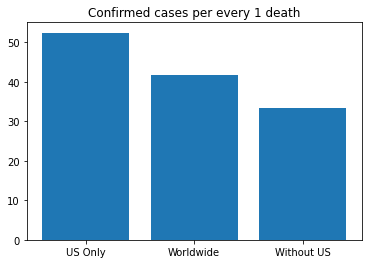

In [122]:
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.title('Confirmed cases per every 1 death')

###This shows that on average, given 1001 predictions, we can see that the US has the lowest death rate per confirmed cases